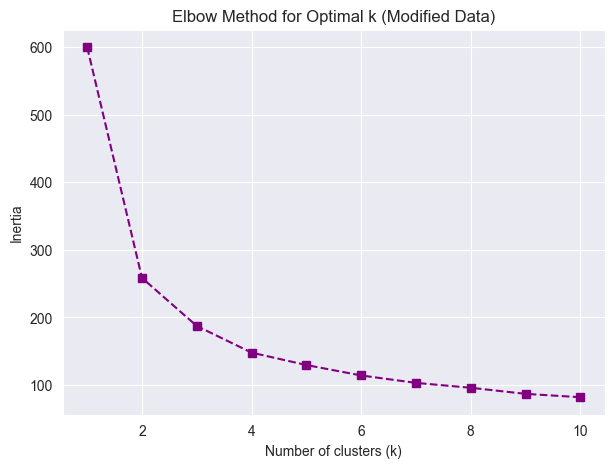

Silhouette Score (modified data): 0.379


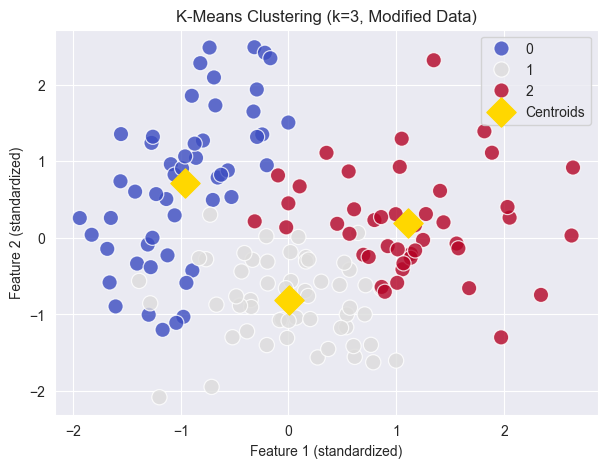

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

iris = load_iris()
X = iris.data.copy()
np.random.seed(42)
X = X + np.random.normal(0, 0.3, X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia, marker='s', linestyle='--', color='purple')
plt.title("Elbow Method for Optimal k (Modified Data)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score (modified data): {score:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette="coolwarm", s=120, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='gold', marker='D', s=220, label='Centroids')
plt.title("K-Means Clustering (k=3, Modified Data)")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.legend()
plt.show()
